**Importing Necessary Libraries**

In [39]:
from qiskit import QuantumCircuit
import numpy as np
from qiskit_aer import AerSimulator

### **Implement the Deutsch-Jozsa algorithm in Qiskit**

The Deutsch-Jozsa algorithm is designed to determine whether a given function 𝑓(𝑥) is constant (same output for all inputs) or balanced (outputs 0 for half of inputs and 1 for the other half).

In [40]:
def dj_function(num_qubits,is_balanced=False):
    qc = QuantumCircuit(num_qubits + 1)
    qc.h(range(num_qubits))  
    qc.h(num_qubits) 
    qc.x(num_qubits)  
    is_balanced = np.random.randint(0, 2) 

    if not is_balanced:
        if np.random.randint(0, 2):  
            qc.x(num_qubits) 
    else:
        on_states = np.random.choice(
            range(2 ** num_qubits), 2 ** (num_qubits - 1), replace=False
        )

        def add_cx(qc, bit_string):
            for qubit, bit in enumerate(reversed(bit_string)):
                if bit == "1":
                    qc.x(qubit)
            return qc

        for state in on_states:
            qc.barrier()
            bit_string = f"{state:0{num_qubits}b}" 
            qc = add_cx(qc, bit_string)
            qc.mcx(list(range(num_qubits)), num_qubits) 
            qc = add_cx(qc, bit_string)

    qc.barrier() 
    return qc

**Explanation:**
- *Constant function:* Outputs the same value for all inputs. This is simulated by flipping the ancillary qubit (x) to always output 1, or doing nothing to output 0.
- *Balanced function:* Outputs 1 for half the inputs and 0 for the other half. Multi-controlled 𝑋 gates are used to represent the function's behavior.

---

### **Show the quantum circuit implementation of the query gate**

To see the quantum circuit representation of the query gate, create it for both constant and balanced functions.


Constant Query Gate:


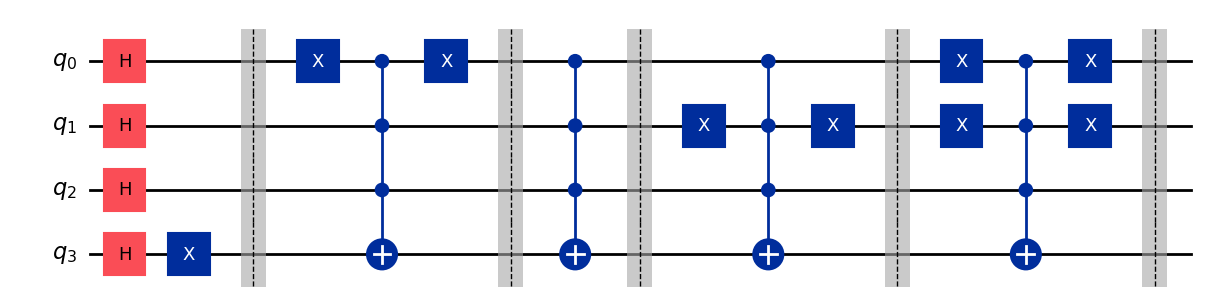

In [45]:
num_qubits = 3

# Create a constant query gate
constant_query = dj_function(num_qubits, is_balanced=False)
print("Constant Query Gate:")
constant_query.draw('mpl')

Balanced Query Gate:


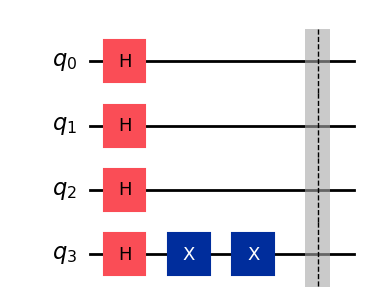

In [49]:
# Create a balanced query gate
balanced_query = dj_function(num_qubits, is_balanced=True)
print("Balanced Query Gate:")
balanced_query.draw('mpl')

**Explanation:**
- *Constant Query:* The gate will simply flip (or not flip) the ancillary qubit.
- *Balanced Query:* The circuit uses multi-controlled gates based on specific states, making it more complex.

---


### **Create the Deutsch-Jozsa circuit, taking a quantum circuit implementation of a query gate as an argument**

The Deutsch-Jozsa circuit applies Hadamard gates, the query gate, and Hadamard gates again to determine if the function is constant or balanced.

In [20]:
def compile_circuit(function: QuantumCircuit):
    n = function.num_qubits - 1
    qc = QuantumCircuit(n+1,n)
    qc.x(n)
    qc.h(range(n+1))
    qc.compose(function, inplace = True)
    qc.h(range(n))
    qc.measure(range(n),range(n))
    return qc

In [21]:
def dj_algorithm(function: QuantumCircuit):
    qc = compile_circuit(function)
    result = AerSimulator().run(qc,shots=1,memory=True).result()
    measurements = result.get_memory()
    if "1" in measurements[0]:
        return "balanced"
    return "constant"

----

### **Test your implementation by choosing a function randomly, displaying the quantum circuit implementation of a query gate for this function, and then running the Deutsch-Jozsa algorithm on that function.**

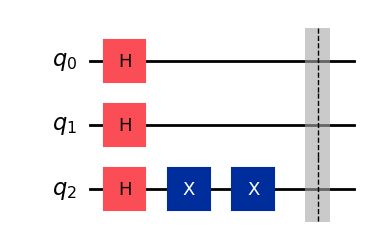

'constant'

In [53]:
f = dj_function(2)
display(f.draw(output="mpl"))
display(dj_algorithm(f))

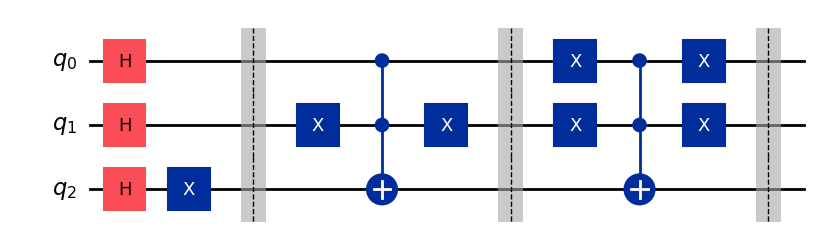

'balanced'

In [54]:
f = dj_function(2)
display(f.draw(output="mpl"))
display(dj_algorithm(f))

**Explanation:**

A random function (constant or balanced) is chosen. The corresponding query gate is created and added to the Deutsch-Jozsa circuit. The circuit is executed, and the results are analyzed:
- If all measured qubits are ∣0⟩, the function is constant.
- Otherwise, it is balanced.


---